###  Cluster different Stocks



In [269]:
# Doing the necessary imports
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
% matplotlib inline

#### Load the dataset

In [246]:
dataset=pd.read_csv('data_stocks.csv')


In [247]:
dataset.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,164.630,888.5500,49.850,219.11,39.43,274.080,31.780,81.03,124.89,58.820,77.725,330.73,72.430,37.470,119.385,167.740,33.7400,46.6450,126.8600,59.720,83.5400,29.020,28.370,63.4900,78.4600,89.90,33.3975,400.9400,...,18.6100,19.8901,70.69,36.26,124.66,164.62,47.0400,106.27,107.65,124.5901,51.6200,112.36,89.35,91.130,55.21,66.5900,120.1300,100.35,65.07,48.730,156.390,60.46,55.70,171.83,73.08,29.62,72.1000,52.160,20.34,34.00,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,164.680,887.1173,49.940,219.98,39.68,273.990,31.780,81.21,124.99,58.495,77.940,330.73,72.040,37.540,118.810,167.776,33.8800,46.6100,126.8600,59.830,83.9400,29.140,28.400,63.4600,78.6200,89.73,33.3950,400.4000,...,18.5100,19.8901,70.77,36.26,124.82,164.39,47.0400,106.27,107.65,124.5901,51.5800,112.36,89.35,91.210,55.12,66.3550,120.1300,100.03,65.04,48.752,157.190,59.93,55.81,171.54,72.95,29.64,72.1800,52.245,20.32,34.07,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,164.905,887.5110,49.860,219.39,39.60,274.275,31.765,81.21,125.00,58.470,77.815,330.73,72.055,37.610,118.830,168.000,33.9000,46.8850,126.9576,59.905,83.9400,29.150,28.375,63.5250,78.6311,89.24,33.4100,401.9850,...,18.4397,19.7900,70.62,36.19,124.82,165.30,46.9800,106.38,107.31,124.7100,51.4600,112.13,89.16,91.080,55.09,66.2417,120.3368,100.39,65.08,48.720,157.070,60.08,55.64,171.55,72.98,29.67,72.3192,52.200,20.26,34.11,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,164.760,886.2700,49.915,219.30,39.57,273.590,31.830,81.13,124.73,58.420,77.950,330.73,72.140,37.620,118.680,168.200,33.8499,46.7000,126.7000,59.700,83.7064,29.125,28.350,63.5300,78.7060,89.17,33.3350,401.5000,...,18.3700,19.7875,70.62,36.00,124.82,165.16,46.8097,106.33,107.49,124.4889,51.3800,112.01,89.06,91.015,55.21,66.1700,120.3100,100.39,64.95,48.695,156.945,60.39,55.64,171.26,73.09,29.79,72.4300,52.140,20.20,33.97,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,164.850,886.5800,49.915,219.18,39.55,273.540,31.830,81.12,124.83,58.600,78.050,330.73,72.215,37.625,118.935,168.040,33.8400,46.8562,126.8900,59.500,84.0000,29.140,28.410,63.6344,78.5850,88.95,33.4000,399.7704,...,18.3850,19.7324,70.78,36.01,124.82,165.24,47.0200,106.56,107.48,125.2449,51.4347,112.23,89.10,91.000,55.32,66.1800,120.3600,100.11,64.84,48.630,157.160,60.18,55.68,171.18,72.99,29.71,72.4800,52.140,20.22,34.00,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [248]:
dataset.shape

(41266, 502)

In [249]:
dataset.drop(['DATE','SP500'],axis=1,inplace=True)


#### Find Correlation between different Stocks

In [250]:
# Finding correlation between variables - identify highly correlated variables
cor = dataset.corr()
cor

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,0.528900,0.803319,0.593574,0.660926,-0.639629,0.096628,0.468258,0.481325,0.404745,0.567155,-0.681113,0.102313,0.211496,0.354914,0.418846,-0.409006,-0.583706,0.662241,0.351587,0.639932,-0.216640,-0.245775,-0.242702,0.436888,-0.720154,0.572157,0.692882,0.395456,-0.203778,0.516034,...,0.267722,0.308307,0.419428,0.584742,-0.074929,0.558827,0.322093,-0.069222,0.396854,-0.086852,0.523509,0.698371,0.385453,0.717439,0.174225,0.349937,0.382945,-0.267094,0.494899,-0.586295,0.688989,0.211689,0.205066,0.665643,0.275277,0.231421,0.335280,0.836602,-0.409519,-0.166749,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,0.131275,0.370111,0.704358,0.671936,-0.531976,0.279693,-0.166888,0.637467,0.133267,0.314661,-0.514152,0.671804,0.546814,0.586400,0.281176,-0.255595,-0.268124,-0.065778,0.511664,0.693353,-0.454380,-0.815710,-0.816333,-0.514896,0.192759,0.728626,0.406884,0.809816,-0.634787,0.506789,...,-0.641435,-0.613584,-0.334032,0.407405,-0.692608,0.588450,0.431350,-0.413968,0.453659,-0.111117,0.297190,0.068743,0.781096,0.308028,0.559299,0.107434,-0.360217,-0.792875,-0.061758,0.211194,0.388563,0.666012,-0.577962,-0.259964,0.484494,-0.059534,0.761047,0.198634,-0.227968,-0.739510,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,0.644373,0.730719,0.961857,0.906947,-0.919636,0.546833,0.365780,0.931362,0.607426,0.584149,-0.751792,0.715841,0.694139,0.636358,0.671714,-0.661589,-0.635736,0.227743,0.806725,0.943406,-0.692531,-0.823994,-0.836548,-0.244885,-0.438944,0.904388,0.745230,0.924572,-0.402959,0.856963,...,-0.441562,-0.396682,-0.261091,0.721148,-0.635885,0.940103,0.590148,-0.489076,0.829064,-0.115298,0.514964,0.356371,0.951404,0.755542,0.719638,0.434775,-0.179305,-0.880266,0.460024,-0.126482,0.719185,0.783377,-0.317679,0.102225,0.754316,0.015326,0.684392,0.719864,-0.470321,-0.668333,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,-0.142261,0.386619,0.321411,0.354330,-0.117133,-0.199210,-0.045582,0.104149,-0.170338,0.281608,-0.224910,-0.044414,-0.146740,0.403285,0.003393,0.037644,-0.290632,0.274731,0.097947,0.273389,-0.004663,-0.122764,-0.113003,0.269439,-0.080326,0.372390,0.313711,0.300005,-0.212344,-0.024600,...,-0.016942,-0.075477,0.311701,0.224380,-0.135777,0.057564,-0.169222,0.083427,0.004071,-0.036888,-0.059792,0.243140,0.140149,0.367813,-0.136562,-0.193338,0.202237,-0.056424,0.357921,-0.140572,0.263736,0.234131,-0.246926,0.125038,-0.064980,-0.273027,0.164550,0.163785,-0.237112,-0.060394,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,0.520941,0.252

In [251]:
au_corr = cor.unstack()
positive_corr=au_corr[au_corr>0]
print(positive_corr)
negative_corr=au_corr[au_corr<0]
print(negative_corr)  

NASDAQ.AAL  NASDAQ.AAL     1.000000
            NASDAQ.AAPL    0.082065
            NASDAQ.ADBE    0.542213
            NASDAQ.ADI     0.209446
            NASDAQ.ADP     0.245801
                             ...   
NYSE.ZTS    NYSE.XRX       0.588426
            NYSE.XYL       0.581894
            NYSE.YUM       0.899693
            NYSE.ZBH       0.271767
            NYSE.ZTS       1.000000
Length: 141320, dtype: float64
NASDAQ.AAL  NASDAQ.AKAM   -0.441142
            NASDAQ.BBBY   -0.639629
            NASDAQ.CHRW   -0.681113
            NASDAQ.COST   -0.409006
            NASDAQ.CSCO   -0.583706
                             ...   
NYSE.ZTS    NYSE.WMB      -0.135316
            NYSE.WU       -0.635135
            NYSE.WY       -0.521397
            NYSE.XEC      -0.792090
            NYSE.XOM      -0.337984
Length: 108680, dtype: float64


In [252]:

positive_corr = positive_corr.sort_values(ascending=False)
#Starting from index 500 as form index 0 to 499 the values of coefficient would be 1
print("Highly positively correlated Stocks are :")
print(positive_corr[500:510])
print("...............................,..............")
print("Highly Negatively correlated Stocks are :")
negative_corr = negative_corr.sort_values(ascending=True)
#Starting from index 500 as form index 0 to 499 the values of coefficient would be 1
print(negative_corr[0:10])

print(".................................................")

print("Highly  correlated Stocks  without direction are :")
au_corr = cor.abs().unstack().sort_values(ascending=False)
au_corr[500:510]

Highly positively correlated Stocks are :
NASDAQ.GOOG   NASDAQ.GOOGL    0.998352
NASDAQ.GOOGL  NASDAQ.GOOG     0.998352
NASDAQ.DISCA  NASDAQ.DISCK    0.996855
NASDAQ.DISCK  NASDAQ.DISCA    0.996855
NASDAQ.NWSA   NASDAQ.NWS      0.996612
NASDAQ.NWS    NASDAQ.NWSA     0.996612
NASDAQ.FOX    NASDAQ.FOXA     0.996182
NASDAQ.FOXA   NASDAQ.FOX      0.996182
NYSE.DD       NYSE.DOW        0.986025
NYSE.DOW      NYSE.DD         0.986025
dtype: float64
...............................,..............
Highly Negatively correlated Stocks are :
NYSE.APC     NYSE.AET      -0.976916
NYSE.AET     NYSE.APC      -0.976916
NYSE.KSU     NYSE.NFX      -0.967553
NYSE.NFX     NYSE.KSU      -0.967553
NYSE.SLB     NASDAQ.ISRG   -0.966186
NASDAQ.ISRG  NYSE.SLB      -0.966186
NYSE.MRO     NASDAQ.ISRG   -0.965143
NASDAQ.ISRG  NYSE.MRO      -0.965143
NYSE.MCD     NYSE.APC      -0.963995
NYSE.APC     NYSE.MCD      -0.963995
dtype: float64
.................................................
Highly  correlated Stocks  wi

NASDAQ.GOOGL  NASDAQ.GOOG     0.998352
NASDAQ.GOOG   NASDAQ.GOOGL    0.998352
NASDAQ.DISCK  NASDAQ.DISCA    0.996855
NASDAQ.DISCA  NASDAQ.DISCK    0.996855
NASDAQ.NWS    NASDAQ.NWSA     0.996612
NASDAQ.NWSA   NASDAQ.NWS      0.996612
NASDAQ.FOX    NASDAQ.FOXA     0.996182
NASDAQ.FOXA   NASDAQ.FOX      0.996182
NYSE.DOW      NYSE.DD         0.986025
NYSE.DD       NYSE.DOW        0.986025
dtype: float64

In [253]:
#As it is a time series Dataset We are using pct_change to  incorporate changes occuring per day for each of the stock
returns = dataset.pct_change().mean()*252
variance=dataset.pct_change().var()*252
tempDict = {'returns':returns, 'variance': variance}
df = pd.DataFrame(data=tempDict)
df.head()


,returns,variance
NASDAQ.AAL,0.000441,0.000205
NASDAQ.AAPL,0.000855,0.000098
NASDAQ.ADBE,0.001144,0.000093
NASDAQ.ADI,0.000198,0.000154
NASDAQ.ADP,0.000310,0.000122


In [254]:
#Standardize the dataset before applying clustering algorithms
df_scaled= StandardScaler().fit_transform(df)
df_scaled.shape


(500, 2)

#### Implement K-Means Algorithm 

For n_clusters = 1 The average WCSS is : 1000.0000000000002
For n_clusters = 2 The average WCSS is : 273.083322517127
For n_clusters = 3 The average WCSS is : 112.6419041699146
For n_clusters = 4 The average WCSS is : 59.576523948606564
For n_clusters = 5 The average WCSS is : 36.00922114208412
For n_clusters = 6 The average WCSS is : 26.2884682931248
For n_clusters = 7 The average WCSS is : 19.654568906605327
For n_clusters = 8 The average WCSS is : 14.507826661088568
For n_clusters = 9 The average WCSS is : 11.721755085779547
For n_clusters = 10 The average WCSS is : 9.582723378911


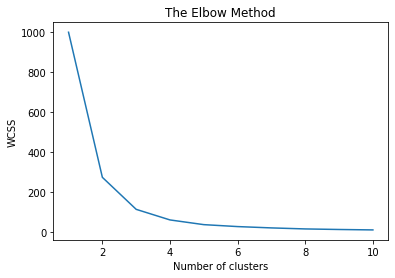

In [239]:
# Implement Elbow method to choose optimal number of clusters
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_scaled)
    print("For n_clusters =", i, "The average WCSS is :",kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9683760381734565
For n_clusters = 3 The average silhouette_score is : 0.5717134366170616
For n_clusters = 4 The average silhouette_score is : 0.5116786200944823
For n_clusters = 5 The average silhouette_score is : 0.5358733332477472
For n_clusters = 6 The average silhouette_score is : 0.4994964726672462
For n_clusters = 7 The average silhouette_score is : 0.5221201009028744
For n_clusters = 8 The average silhouette_score is : 0.5190535690100329
For n_clusters = 9 The average silhouette_score is : 0.5143468902930901
For n_clusters = 10 The average silhouette_score is : 0.5073411989803466


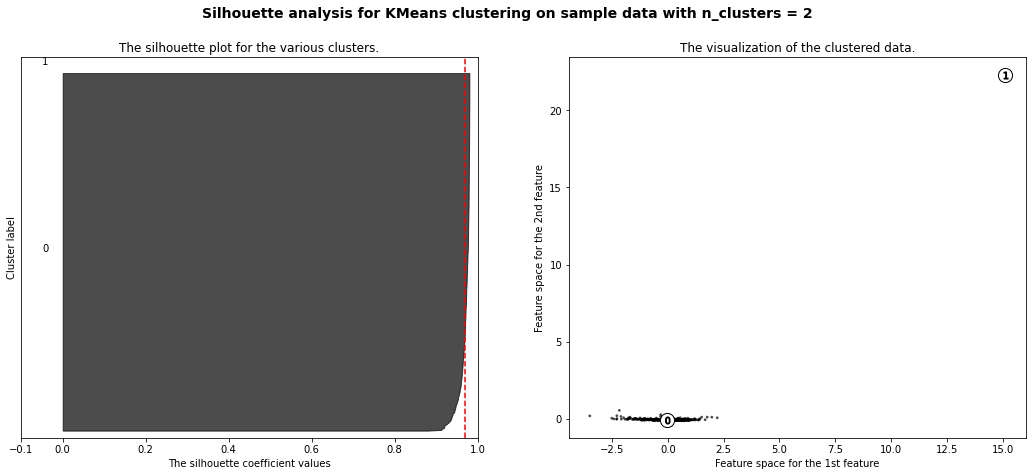

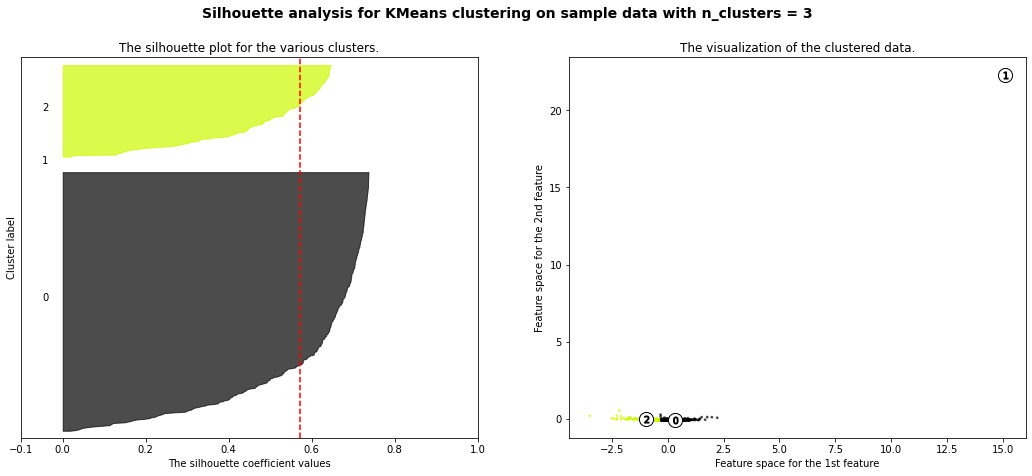

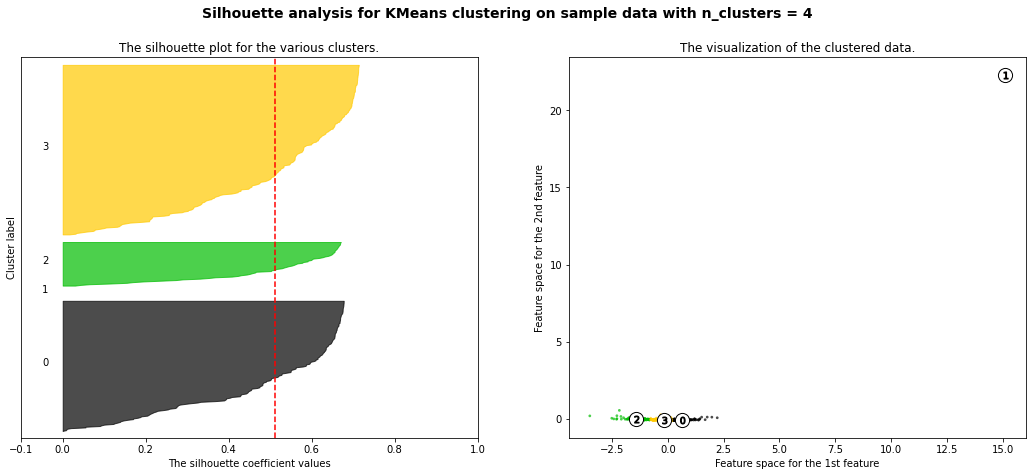

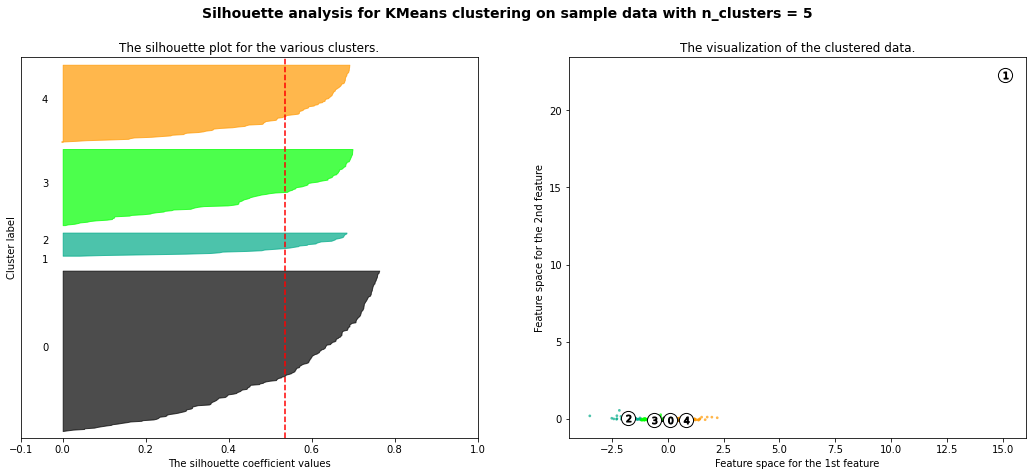

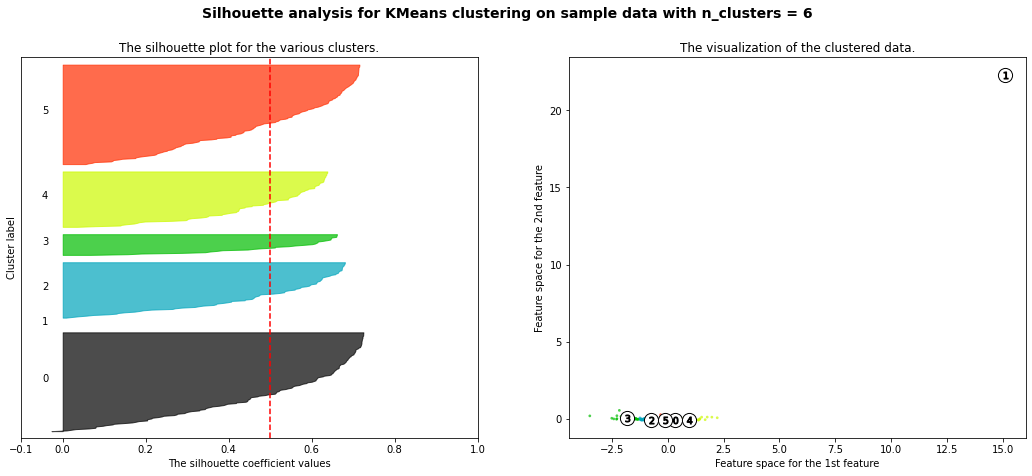

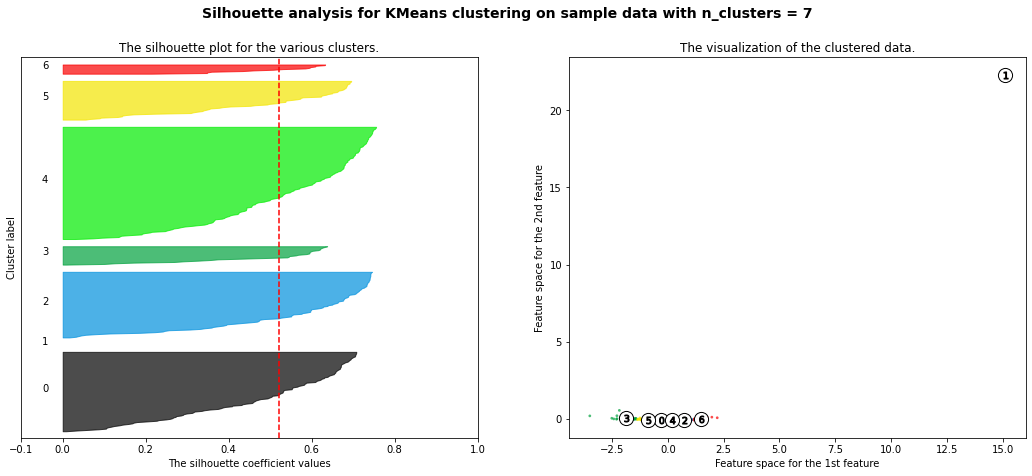

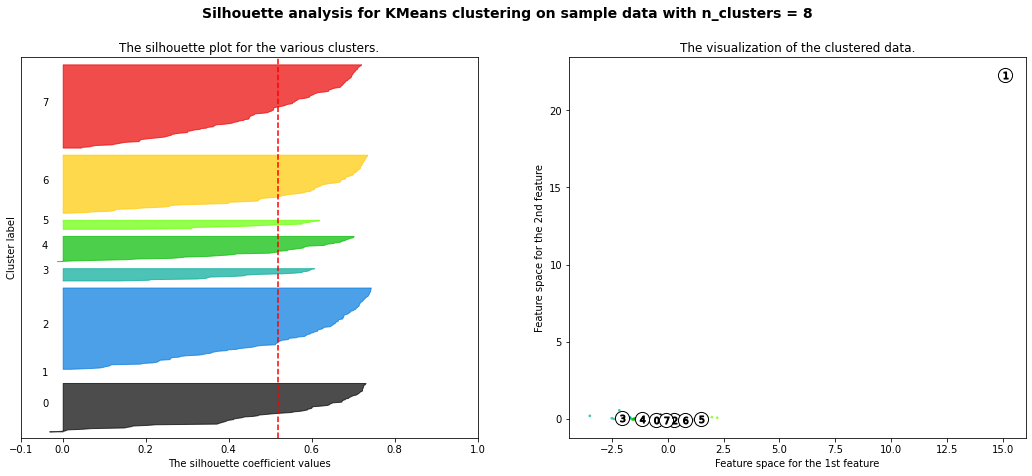

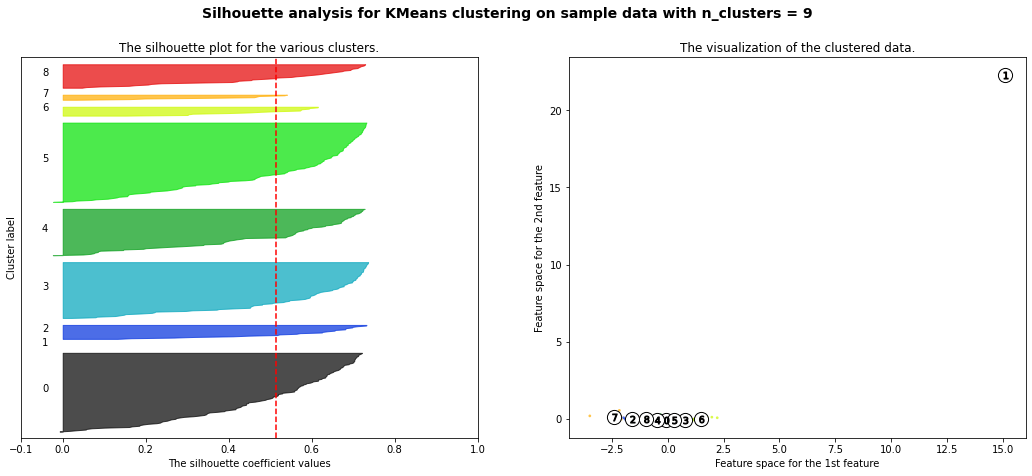

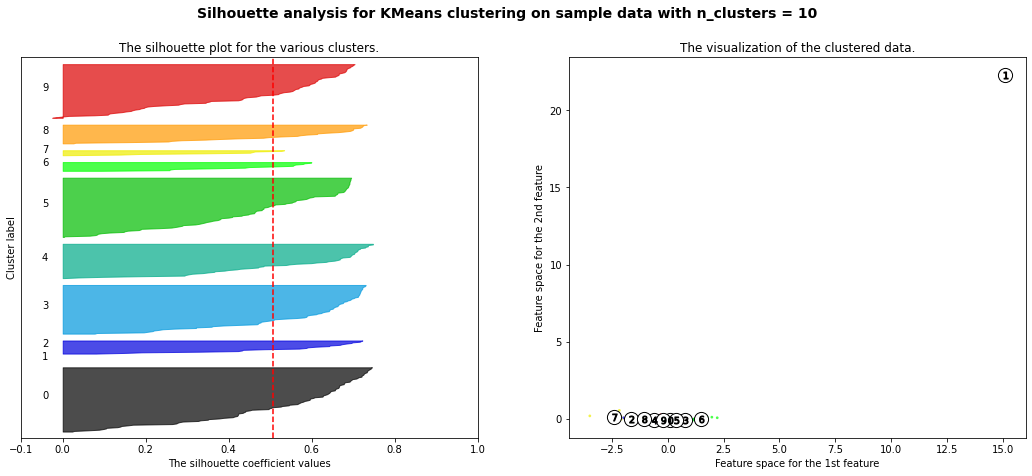

In [242]:
#We would also see the silhouette score for each cluster. There should not be any negative score value for any data points
#in that cluster and the avg score should be near  to 1
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2,3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_scaled[:,0], df_scaled[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [243]:
# Fit  K-Means to the dataset-  We could use K=3 low WCSS and high silhouette_score
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_scaled)
print("Cluster labels are ", y_kmeans)

Cluster labels are  [0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 2 2 2 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 2 2 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0
 2 0 0 0 2 2 0 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 0 2 2 0 0 0 2 2 0 0 0 0 2 0 2
 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 2 2
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 0 2 0 0 0 0
 2 0 0 0 0 2 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 2 2 2 0 0 2 0 0 2 2 2 0 0 2 0 0 0 2 2 0 2 0 2 0 2 0 2 0 2 0 0 0 2
 0 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0 0 2 2 0 0 0
 0 0 0 0 2 2 0 2 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 2 0
 0 2 0 2 2 0 2 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 2 0 0 0 0 2 0 2 0 0 0 0 2 0 0 2 0 0 0 0 2 2 2 2 0 2 0 0 0 0 0 0 2 0
 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 2 

In [256]:
#Add to the original dataFrame
df['clusterNo']=y_kmeans
df.head()

,returns,variance,clusterNo
NASDAQ.AAL,0.000441,0.000205,0
NASDAQ.AAPL,0.000855,0.000098,0
NASDAQ.ADBE,0.001144,0.000093,0
NASDAQ.ADI,0.000198,0.000154,0
NASDAQ.ADP,0.000310,0.000122,0


In [257]:
#Calculate silhouette score
silhouette_avg = metrics.silhouette_score(df_scaled,y_kmeans)
print("silhouette score of K Means algo is",silhouette_avg)

silhouette score of K Means algo is 0.5717134366170616


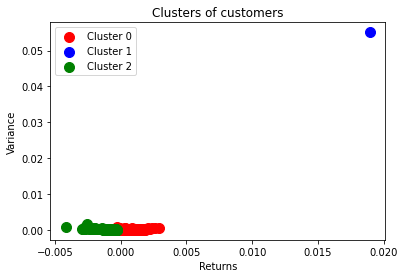

In [259]:
# Visualise  the clusters
plt.scatter(df[df['clusterNo'] == 0]['returns'], df[df['clusterNo'] == 0]['variance'], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(df[df['clusterNo'] == 1]['returns'], df[df['clusterNo'] == 1]['variance'], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(df[df['clusterNo'] == 2]['returns'], df[df['clusterNo'] == 2]['variance'], s = 100, c = 'green', label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('Returns')
plt.ylabel('Variance')
plt.legend()
plt.show()

In [268]:
#Cluster 0 can be termed as stocks having lower Variance and moderate returns.
#Cluster 1 can be termed as stocks having higher Variance and high returns.[Might be an outlier]
#Cluster 2 can be termed as stocks having lower Variance and lower returns.
#Show 10 stocks of cluster 0. Similarly stocks of different clusters can be found and stored in
#csv files for further exploration.
list(df[df['clusterNo']==0].index[0:11])



['NASDAQ.AAL',
 'NASDAQ.AAPL',
 'NASDAQ.ADBE',
 'NASDAQ.ADI',
 'NASDAQ.ADP',
 'NASDAQ.ADSK',
 'NASDAQ.ALXN',
 'NASDAQ.AMAT',
 'NASDAQ.AMD',
 'NASDAQ.AMGN',
 'NASDAQ.AMZN']

##### Implement DBScan algorithm 

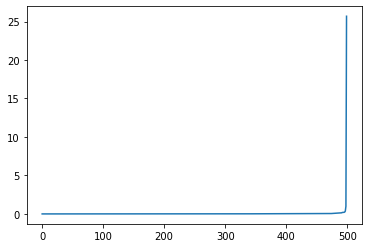

In [285]:
#Choose values of eps and min points using NearestNeigbours.
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances1 = np.sort(distances, axis=0)
distances1 = distances1[:,1]
plt.plot(distances1)

In [286]:
distances1.mean()

0.07085025407658634

In [287]:
# DBSCAN
#We took eps near to the mean of the distances obtained from above step .
dbscan=DBSCAN(eps=0.08,min_samples=5)
model=dbscan.fit(df_scaled)
labels=model.labels_
print("labels from DBScan algorithm",labels)



labels from DBScan algorithm [ 0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0 -1  0  0 -1  0  0 -1  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  1 -1  0  0  0
  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  2  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0
  0  1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0 

In [288]:
# Number of clusters in labels, ignoring noise if present(-1 represents Noise).
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the DBSCAN algorithm
n_noise_ = list(labels).count(-1)  # calculating the number of clusters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 26


In [289]:
#Display the clusters
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)  # creating an array of true and false as the same size as db.labels
core_samples_mask[model.core_sample_indices_] = True  # setting the indices of the core regions to True



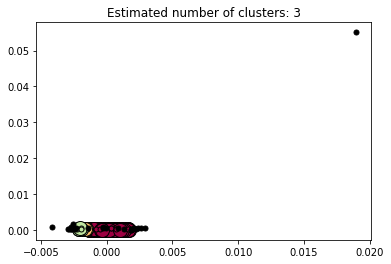

In [290]:
# Plot result
# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap

for k, col in zip(unique_labels, colors):
  if k == -1:
    # Black used for noise.
    col = [0, 0, 0, 1]
  class_member_mask = (labels == k)   # assigning class members for each class
  xy = df[class_member_mask & core_samples_mask] # creating the list of points for each class
  plt.plot(xy.iloc[:,0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
  xy = df[class_member_mask & ~core_samples_mask] # creating the list of noise points
  plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### As we can see DBSCAN is succesfull in excluding the outliers from all the the clusters which K -Means algorithm was not doing;though clusters doesn't seem to be be distinct enough